In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from utils import *

# manual parameters

In [2]:
n = 2048  # object size in each dimension
npos = 225 # total number of positions
z1 = 0.6-0.073 # [m] position of the CA
detector_pixelsize = 0.55e-6
energy = 19.55  # [keV] xray energy
wavelength = 1.24e-09/energy  # [m] wave length
focusToDetectorDistance = 2.8669  # [m]
z2 = focusToDetectorDistance-z1
distances = (z1*z2)/focusToDetectorDistance
magnification = focusToDetectorDistance/z1
voxelsize = np.abs(detector_pixelsize/magnification)  # object voxel size
print(12e-6/voxelsize)


118.69173710539933


# Data read

(225, 2592, 4608)


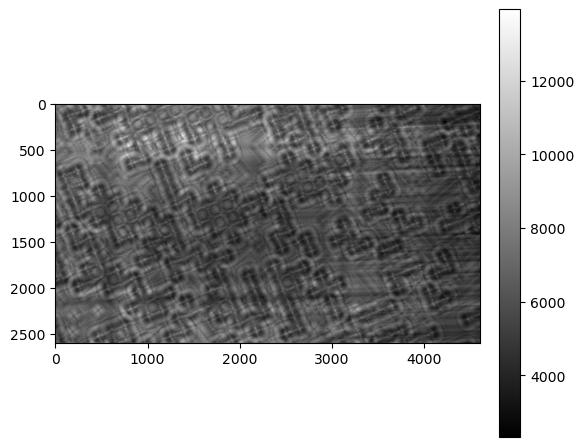

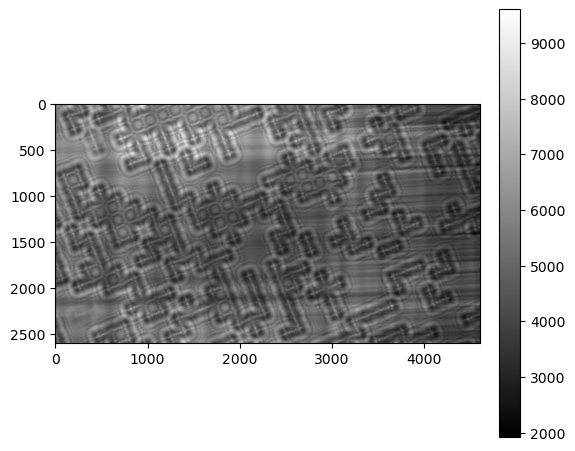

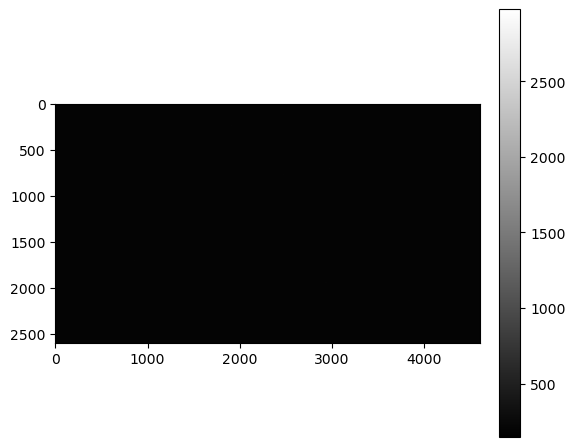

In [4]:
th="3920"

# path = f'/data/visitors/danmax/20241507/2025060408/raw/nanoCT_test_pattern'
# with h5py.File(f'{path}/scan-3889_orca.h5') as fid:
#     data = fid['/entry/instrument/orca/data'][:].astype('float32')
    
# with h5py.File(f'{path}/scan-3888_orca.h5') as fid:
#     ref = fid['/entry/instrument/orca/data'][:].astype('float32')
# with h5py.File(f'{path}/scan-3887_orca.h5') as fid:
#     dark = fid['/entry/instrument/orca/data'][:].astype('float32')

path = f'/data/visitors/danmax/20241507/2025060408/raw/NTT_SiemensStar_2/'
with h5py.File(f'{path}/scan-3920_orca.h5') as fid:
    data = fid['/entry/instrument/orca/data'][:].astype('float32')
    
with h5py.File(f'{path}/scan-3919_orca.h5') as fid:
    ref = fid['/entry/instrument/orca/data'][:].astype('float32')
with h5py.File(f'{path}/scan-3915_orca.h5') as fid:
    dark = fid['/entry/instrument/orca/data'][:].astype('float32')

print(data.shape)
mshow(data[0],True)
mshow(ref[0],True)
mshow(dark[0],True)

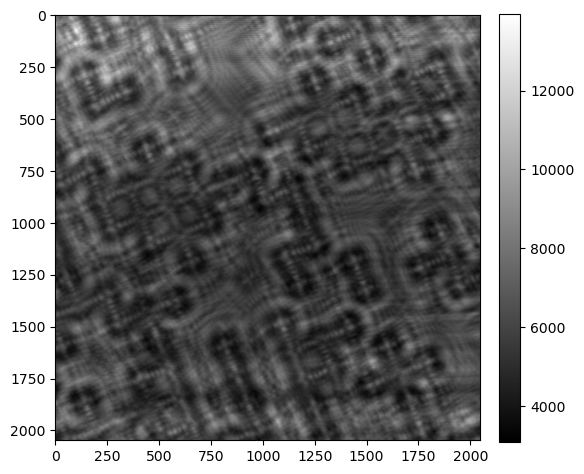

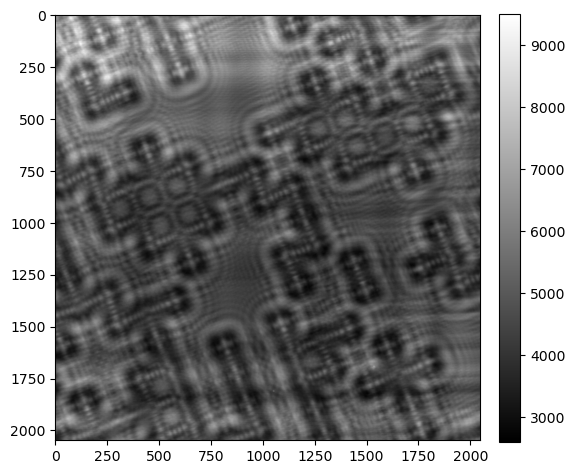

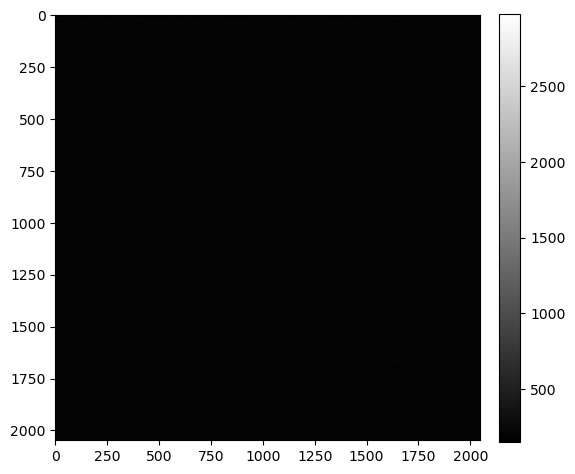

In [5]:
s = data.shape
data = data[:,s[1]//2-1024:s[1]//2+1024,s[2]//2-1024:s[2]//2+1024]
ref = ref[:,s[1]//2-1024:s[1]//2+1024,s[2]//2-1024:s[2]//2+1024]
dark = dark[:,s[1]//2-1024:s[1]//2+1024,s[2]//2-1024:s[2]//2+1024]

mshow(data[0],True)
mshow(ref[0],True)
mshow(dark[0],True)

In [6]:
print(th)
import os
os.system(f'mkdir -p /data/visitors/danmax/20241507/2025060408/viktor/ca_{th}/')
path_out = f'/data/visitors/danmax/20241507/2025060408/viktor/ca_{th}/'
with  h5py.File(f'{path_out}/data_ca.h5','w') as fid:
    fid.create_dataset(f'/exchange/data',data=data) 
    fid.create_dataset(f'/exchange/data_white',data=ref) 
    fid.create_dataset(f'/exchange/data_dark',data=dark) 

    dz1 = fid.create_dataset('/exchange/z1',shape=(1,),dtype='float32')
    ddetector_pixelsize = fid.create_dataset('/exchange/detector_pixelsize',shape=(1,),dtype='float32')
    dfocusdetectordistance = fid.create_dataset('/exchange/focusdetectordistance',shape=(1,),dtype='float32')
    denergy = fid.create_dataset('/exchange/energy',shape=(1,),dtype='float32')    

    dz1[:]=z1
    ddetector_pixelsize[0]=detector_pixelsize
    dfocusdetectordistance[0]=focusToDetectorDistance
    denergy[0]=energy


3920


In [7]:
data.shape

(225, 2048, 2048)

In [8]:
# import numpy as np
# ids = np.arange(225)
# for k in range(15):    
#     if k%2==1:
#         ids[k*15:(k+1)*15] = ids[k*15:(k+1)*15][::-1]
# ids[ids]